# Flight Price Prediction Machine Learning Model

## Exploring Data Types

In [1]:
import pandas as pd

df = pd.read_csv('flight price prediction/Clean_Dataset.csv')

In [2]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
df.airline.value_counts() # one hot encode

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [4]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [5]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [6]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [11]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [12]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [14]:
df['class'].value_counts() # make a 0 or 1 feature

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [16]:
df.duration.min() # shortest flight

0.83

In [17]:
df.duration.max() # longest flight

49.83

In [18]:
df.duration.median() # avg flight

11.25

### Final Data Types
airline: one hot encode  
source_city: one hot encode  
departure_time: one hot encode  
arrival_time: one hot encode  
destination_city: one hot encode
stops: numerical (0-2)  
class: binary (0-1)  
duration: leave as is (num)  
days_left: leave as is (num)  
price: leave as is (num)  

## Preprocessing Data

In [7]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)

df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)

In [8]:
df.stops = pd.factorize(df.stops)[0]

In [9]:
df = df.join(pd.get_dummies(df.airline, prefix='airline')).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source')).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='dest')).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival')).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure')).drop('departure_time', axis=1)

I dropped the two unused categories, unnamed and flight, and one hot encoded airline, source city, destination city, arrival time, and departure time. I converted the class as 1 for business class and 0 for economy. I factorized the stops from zero, one, two or more, to becoming numerical (1, 2, or 3).

In [10]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


## Training Regression Model

In [11]:
from sklearn.model_selection import train_test_split # split into testing and training sets
from sklearn.ensemble import RandomForestRegressor

X, y = df.drop('price', axis=1), df.price

X: df with all feature columns except 'price' that is used to predict target variable  
y: target variable that is to be predicted

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

train_test_split splits into random training and testing subsets.  
20% of data is for testing, 80% for training.

### Random Forest Regressor Model

In [26]:
reg_default = RandomForestRegressor(n_jobs=-1) # speed up computation by using all CPU cores

reg_default.fit(X_train, y_train) # trains the model

RandomForestRegressor(n_jobs=-1)

In [27]:
reg_default.score(X_test, y_test) # R^2 value: accuracy from 0-1

0.9848216894152774

In [29]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_default = reg_default.predict(X_test) # generates prediction for X_test

r2_default = r2_score(y_test, y_pred) # calculates r2 score fom how well y_pred is to test values y_test
MAE_default = mean_absolute_error(y_test, y_pred)
MSE_default = mean_squared_error(y_test, y_pred)
RMSE_default = math.sqrt(MSE_default)

print('R2:', r2_default)
print('MAE:', MAE_default)
print('MSE:', MSE_default)
print('RMSE:', RMSE_default)

R2: 0.9848307118904118
MAE: 1078.1181430664142
MSE: 7807819.1274465965
RMSE: 2794.2475064758664


Text(0.5, 1.0, 'Prediction vs Actual Price')

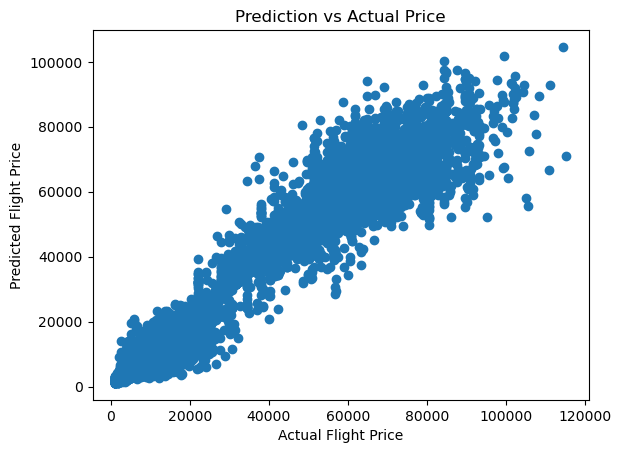

In [30]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction vs Actual Price')

As seen from the margin of errors and scatterplot, we can see that using a Random Forest Regressor is already pretty accurate. Let's see if we can fine tune it even more.

In [17]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

### Feature Importances

Here, I ranked the features based on their level of influence to the model. The features are sorted from most to least important.

In [32]:
importances = dict(zip(reg_default.feature_names_in_, reg_default.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importances # prints out which features are the most influential in the model

[('class', 0.8800698221870147),
 ('duration', 0.05728848178298755),
 ('days_left', 0.018488553800000744),
 ('airline_Vistara', 0.005308111311561867),
 ('airline_Air_India', 0.00465215905523993),
 ('source_Delhi', 0.0038380140382419862),
 ('dest_Delhi', 0.003257822070567555),
 ('source_Mumbai', 0.0021295607172942903),
 ('stops', 0.0018792389410269479),
 ('dest_Mumbai', 0.0018527486729841135),
 ('dest_Kolkata', 0.0018439269520477526),
 ('source_Kolkata', 0.001834675902886905),
 ('arrival_Evening', 0.0015695141184535863),
 ('dest_Hyderabad', 0.0015285090650493237),
 ('dest_Bangalore', 0.0012836430248982207),
 ('source_Hyderabad', 0.0012648541962122057),
 ('arrival_Night', 0.0011606979254879155),
 ('source_Bangalore', 0.0011147413571118492),
 ('departure_Evening', 0.0011142611785396213),
 ('arrival_Afternoon', 0.0009973554153988478),
 ('source_Chennai', 0.000952703600255867),
 ('dest_Chennai', 0.0009241268591607294),
 ('departure_Morning', 0.0009119156956063119),
 ('departure_Afternoon', 0

<BarContainer object of 10 artists>

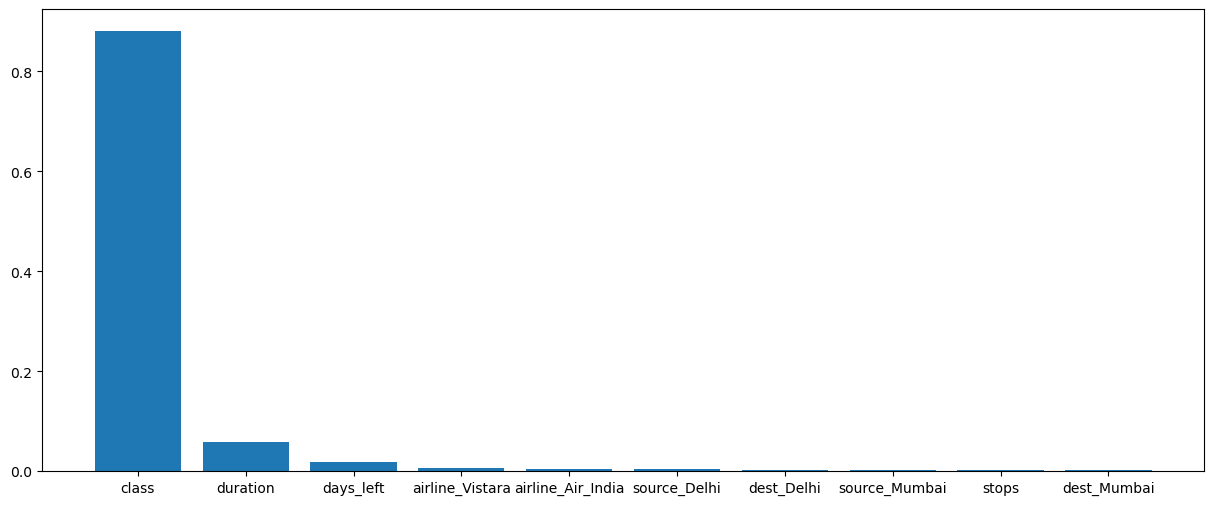

In [33]:
plt.figure(figsize=(15, 6))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])

Most important feature is class, followed by duration and days left. Airlines do not really matter in this case.

## Finetuning Regression Model Using Parameter Tuning

### GridSearchCV Model

Can use grid search, but would take too long with too many combos.

In [ ]:
# from sklearn.model_selection import GridSearchCV

# reg = RandomForestRegressor(n_jobs=-1)

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt']
# }

# grid_search = GridSearchCV(reg, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_

### RandomizedSearchCV Model

Use randomized search to minimize runtime.

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': [1.0, 'sqrt', 'log2']
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3,
                                   scoring='neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-1)

random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [24]:
best_regressor.score(X_test, y_test)

0.9859371143064607

This is the R^2 value, which represents the goodness of fit and accuracy of the regression model. It's slightly higher than before!

In [37]:
y_pred_tuned = best_regressor.predict(X_test)
r2_tuned = r2_score(y_test, y_pred_tuned)
MAE_tuned = mean_absolute_error(y_test, y_pred_tuned)
MSE_tuned = mean_squared_error(y_test, y_pred_tuned)
RMSE_tuned = math.sqrt(MSE_tuned)

print('R2:', r2_tuned)
print('MAE:', MAE_tuned)
print('MSE:', MSE_tuned)
print('RMSE:', RMSE_tuned)

R2: 0.9859111598118723
MAE: 1089.279047802281
MSE: 7251699.295952555
RMSE: 2692.897936415815


Text(0.5, 1.0, 'Prediction vs Actual Price')

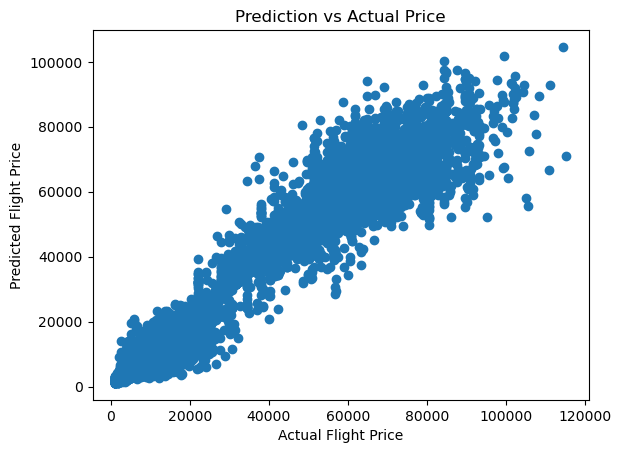

In [38]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction vs Actual Price')

## Analyzing Prediction Results

### Default Model (Random Forest Regressor)

In [39]:
print('R2:', r2_default)
print('MAE:', MAE_default)
print('MSE:', MSE_default)
print('RMSE:', RMSE_default)

R2: 0.9848307118904118
MAE: 1078.1181430664142
MSE: 7807819.1274465965
RMSE: 2794.2475064758664


### Tuned Model (Randomized Search)

In [40]:
print('R2:', r2_tuned)
print('MAE:', MAE_tuned)
print('MSE:', MSE_tuned)
print('RMSE:', RMSE_tuned)

R2: 0.9859111598118723
MAE: 1089.279047802281
MSE: 7251699.295952555
RMSE: 2692.897936415815


### Default vs Tuned Model Accuracies

Put in a data frame the margin errors of the random forest regressor vs randomized search models to compare.

In [53]:
summary_data = {
    'Metric': ['R^2', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'],
    'Default Model': [r2_default, MAE_default, MSE_default, RMSE_default],
    'Tuned Model': [r2_tuned, MAE_tuned, MSE_tuned, RMSE_tuned]
}

summary_df = pd.DataFrame(summary_data)

In [55]:
summary_df

,Metric,Default Model,Tuned Model
0,R^2,9.848307e-01,9.859112e-01
1,Mean Absolute Error,1.078118e+03,1.089279e+03
2,Mean Squared Error,7.807819e+06,7.251699e+06
3,Root Mean Squared Error,2.794248e+03,2.692898e+03


The tuned model using RandomizedSearchCV is slightly more accurate, with a better R^2 (variance), mean squared error, and root mean squared error. The default model has a better mean absolute error, meaning the magnitude of its errors are smaller. Overall, the parameter tuning has enhanced some aspects of the model performance.

### Prediction vs Actual Price Scatterplot

Text(0.5, 1.0, 'Prediction vs Actual Price')

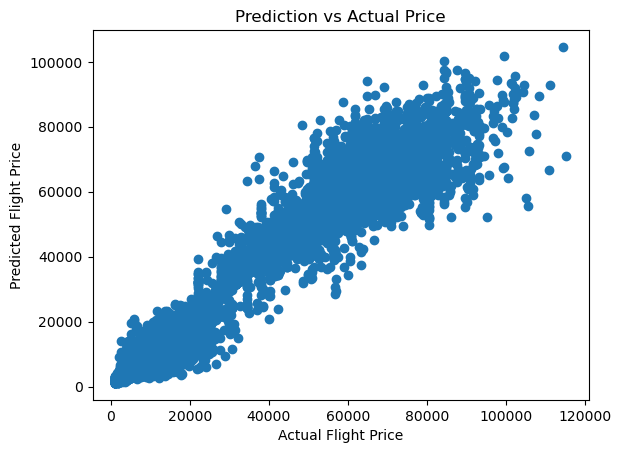

In [56]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction vs Actual Price')

Overall, the tuned model is pretty accurate in predicting the flight price, as the margin errors are miniscule. Looking at the feature importances, we can see that the most important feature is by far class, followed by duration and days left.